In [2]:
sol_spec = open('solar_spectrum_export.txt','r') #data file

data = sol_spec.readlines() #reading each line of the file

wl = []; det1 = []; det2 = [] #creating lists to store data

for line in data:
    list = line.split()
    wl.append(float(list[0]))
    det1.append(float(list[1]))
    det2.append(float(list[2]))

sol_spec.close()

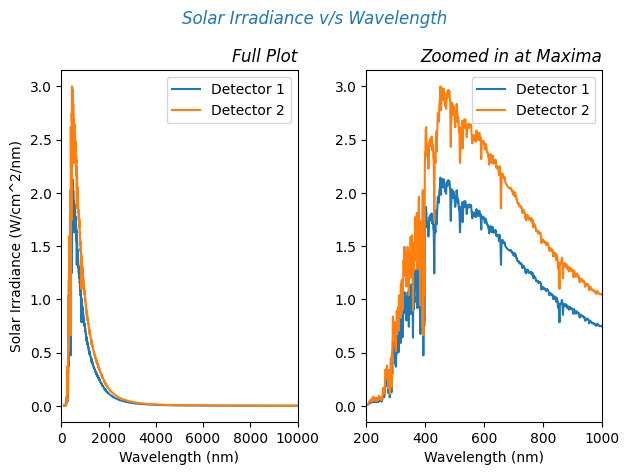

In [3]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(wl,det1)
plt.plot(wl,det2)
plt.xlim(0,10000)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Solar Irradiance (W/cm^2/nm)")
plt.legend(["Detector 1","Detector 2"])
plt.title(label="Full Plot",loc="right",fontstyle="italic")

plt.subplot(1,2,2)
plt.plot(wl,det1)
plt.plot(wl,det2)
plt.xlim(200,1000)
plt.xlabel("Wavelength (nm)")
plt.legend(["Detector 1","Detector 2"])
plt.title(label="Zoomed in at Maxima",loc="right",fontstyle="italic")

plt.suptitle(t="Solar Irradiance v/s Wavelength",fontstyle="italic",color="tab:blue")
plt.tight_layout()



plt.show()

In [4]:
from scipy.constants import c, h, k
from math import e

B0 = 2*h*(c**2); a0 = (h*c)/k #defining some constants



def B(T,l): #defining the solar irradiance as a fucntion of temperature (T) & wavelength (l)
    return (B0/((l*1e-09)**5))*(1/((e**(a0/(l*T*1e-09)))-1))*1e-13 #in nanometer units of wavelength


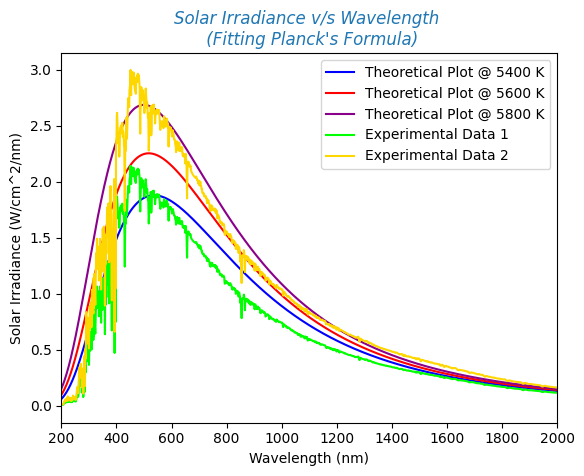

In [5]:
import numpy as np

X = np.arange(200,2000,0.1)
Y1 = B(5400,X)
Y2 = B(5600,X)
Y3 = B(5800,X)

plt.plot(X,Y1,color="blue")
plt.plot(X,Y2,color="red")
plt.plot(X,Y3,color="darkmagenta")
plt.plot(wl,det1,color="lime")
plt.plot(wl,det2,color="gold")
plt.xlim(200,2000)
plt.legend(["Theoretical Plot @ 5400 K","Theoretical Plot @ 5600 K","Theoretical Plot @ 5800 K",
            "Experimental Data 1","Experimental Data 2"])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Solar Irradiance (W/cm^2/nm)")
plt.title(label="Solar Irradiance v/s Wavelength \n (Fitting Planck's Formula)",fontstyle="italic",color="tab:blue")


plt.show()